In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('block_2.csv')

In [ ]:

df

In [ ]:
df.text[4][round(len(df.text[4])/2):]

In [ ]:
len(df.text[4])

In [ ]:
df_text[:round(len(df.text[4])/2)]

In [ ]:
first_half = msa(df_text[:round(len(df.text[4])/2)]) 
second_half = msa(df_text[round(len(df.text[4])/2):])
if first_half[0]['label'] == second_half[0]['label']:
    label = first_half[0]['label']
    score = (test_1[0]['score'] + test_2[0]['score'])/2
done = [{'label': label, 'score': score}]

In [ ]:
beginning = msa(df_text[:round(len(df.text[4])/3)]) 
middle = msa(df_text[round(len(df.text[4])/3):round(len(df.text[4])2/3)])
end = msa(df_text[round(len(df.text[4])2/3):])

if (beginning[0]['label'] == middle[0]['label']) and (beginning[0]['label'] == end[0]['label']):
    label = first_half[0]['label']
    score = (beginning[0]['score'] + middle[0]['score'] + end[0]['score'])/3
    done = [{'label': label, 'score': score}]
    return done

In [ ]:
df.text.iloc[1]

In [ ]:
df = pd.read_csv('block_2.csv')

In [ ]:
df.dropna().info()

In [ ]:
df.info()

In [ ]:
import pyautogui


def main():
    pyautogui.PAUSE = 45
    pyautogui.FAILSAFE = True
    while True:
        pyautogui.moveTo(100, 200, 2)
        pyautogui.moveTo(200,100, 2)

main()

In [ ]:
import pandas as pd
from googletrans import Translator
from camel_tools.sentiment import SentimentAnalyzer
from transformers import pipeline

In [ ]:
df = pd.read_csv('block_2.csv')

In [ ]:
df.info()

In [ ]:
df[df.text.str.len() < 5000]

In [ ]:
df.iloc[45300: 45350].to_csv('sample.csv')

In [ ]:
df.head(170).to_csv('sample.csv')

In [ ]:
import pandas as pd
from googletrans import Translator
from camel_tools.sentiment import SentimentAnalyzer
from transformers import pipeline

""" 
Change name to which file you're doing sentiment analysis on, NOT including the '.csv' 
Output file will be 'labeled_<filename>.csv'
"""

msa = pipeline('text-classification', model="CAMeL-Lab/bert-base-arabic-camelbert-msa-sentiment")
name = 'sample'


def load_and_label_df(name):
    df = load_csv('/Users/amanda22/codeup-data-science/arabic_media_nlp_project/andrews_work/'+name+'.csv')
    print(f'loaded {name}.csv')
    print('labeling/scoring...')
    df = create_labels_scores(df, name)
    print('done labeling/scoring!')
    return df

def load_csv(filename):
    df = pd.read_csv(filename)
    df['text_label'] = 'invalid'
    df['text_score'] = 'invalid'
    df['headline_label'] = 'invalid'
    df['headline_score'] = 'invalid'
    return df

def make_msa(df_text):
    try:
        done = msa(df_text)
        return done
    except:
        
        try:
            first_half = msa(df_text[:round(len(df_text)/2)]) 
            second_half = msa(df_text[round(len(df_text)/2):])
            if first_half[0]['label'] == second_half[0]['label']:
                label = first_half[0]['label']
                score = (first_half[0]['score'] + second_half[0]['score'])/2
            done = [{'label': label, 'score': score}]
            return done
        except:
            return [{'label': 'unlabeled', 'score': 'unscored'}]
        
def analyze_text(df):
    scores = []
    scores = df.text.apply(make_msa)
    return scores

def analyze_headline(df):
    headline_scores = []
    scores = df.headline.apply(make_msa)
    return scores

def label_and_scores(msa_scores):
    labels = []
    scores = []
    for val in msa_scores:
        try:
            labels.append(val[0]['label'])
            scores.append(val[0]['score'])
        except:
            labels.append(False)
            scores.append(False)

    return labels, scores

def create_labels_scores(df, name):
    text_scores = analyze_text(df)
    labels, scores = label_and_scores(text_scores)
    df['text_label'] = labels
    df['text_score'] = scores

    headline_scores = analyze_headline(df)
    labels, scores = label_and_scores(headline_scores)
    df['headline_label'] = labels
    df['headline_score'] = scores

    # CHANGE 'BLOCK_NAME' TO WHATEVER YOU WANT
    df.to_csv('labeled_'+ name + '.csv', index=False)

    return df

load_and_label_df('sample')

In [ ]:
load_and_label_df('sample')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('block_2.csv')

In [ ]:
df

In [ ]:
range_list = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 119254]

for i in range(12):
    first = int(range_list[i])
    second = int(range_list[i+1])
    print(first, second)
    df.iloc[first:second].to_csv('block_2_'+str(i)+'.csv')
    

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('labeled_block_2_0.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'labeled_block_2_0.csv'

In [ ]:
df.text_label.value_counts()

In [ ]:
df.source.value_counts()

In [11]:
import pandas as pd
import date_fixer
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('daily8_2.csv')

In [5]:
df.source.value_counts()

Youm7             3927
SaudiYoum         3484
Techreen          2856
Alittihad         2856
Almustaqbal       2681
Almasryalyoum     2142
Ryiadh            2142
Alqabas           1960
Sabanews          1157
Echoroukonline     357
Name: source, dtype: int64

In [6]:
new = date_fixer.make_datetime(df)

TRN_ARB_0297955successful
TRN_ARB_0297957successful
TRN_ARB_0297958successful
TRN_ARB_0297960successful
TRN_ARB_0297984successful
TRN_ARB_0297985successful
TRN_ARB_0298009successful
TRN_ARB_0298010successful
TRN_ARB_0298011successful
TRN_ARB_0298015successful
TRN_ARB_0298017successful
TRN_ARB_0298018successful
TRN_ARB_0298039successful
TRN_ARB_0298057successful
TRN_ARB_0298060successful
TRN_ARB_0298061successful
TRN_ARB_0298062successful
TRN_ARB_0298063successful
TRN_ARB_0298065successful
TRN_ARB_0298067successful
TRN_ARB_0298068successful
TRN_ARB_0298071successful
TRN_ARB_0298072successful
TRN_ARB_0298073successful
TRN_ARB_0298074successful
TRN_ARB_0298088successful
TRN_ARB_0298128successful
TRN_ARB_0298130successful
TRN_ARB_0298134successful
TRN_ARB_0298153successful
TRN_ARB_0298162successful
TRN_ARB_0298163successful
TRN_ARB_0298165successful
TRN_ARB_0298171successful
TRN_ARB_0298173successful
TRN_ARB_0298176successful
TRN_ARB_0298178successful
TRN_ARB_0298184successful
TRN_ARB_0298

YM7_ARB_0470980successful
YM7_ARB_0470981successful
YM7_ARB_0470988successful
YM7_ARB_0470989successful
YM7_ARB_0470999successful
YM7_ARB_0471027successful
YM7_ARB_0471048successful
YM7_ARB_0471050successful
YM7_ARB_0471071successful
YM7_ARB_0471097successful
YM7_ARB_0471102successful
YM7_ARB_0471111successful
YM7_ARB_0471115successful
YM7_ARB_0471118successful
YM7_ARB_0471121successful
YM7_ARB_0471123successful
YM7_ARB_0471164successful
YM7_ARB_0471170successful
YM7_ARB_0471174successful
YM7_ARB_0471181successful
YM7_ARB_0471182successful
YM7_ARB_0471205successful
YM7_ARB_0471208successful
YM7_ARB_0471221successful
YM7_ARB_0471228successful
YM7_ARB_0471264successful
YM7_ARB_0471298successful
YM7_ARB_0471310successful
YM7_ARB_0471314successful
YM7_ARB_0471380successful
YM7_ARB_0471381successful
YM7_ARB_0471394successful
YM7_ARB_0471425successful
YM7_ARB_0471432successful
YM7_ARB_0471443successful
YM7_ARB_0471448successful
YM7_ARB_0471494successful
YM7_ARB_0471502successful
YM7_ARB_0471

TRN_ARB_0281294successful
TRN_ARB_0281296successful
TRN_ARB_0281297successful
TRN_ARB_0281301successful
TRN_ARB_0281341successful
TRN_ARB_0281343successful
TRN_ARB_0281357successful
TRN_ARB_0281360successful
TRN_ARB_0281371successful
TRN_ARB_0281383successful
TRN_ARB_0281384successful
TRN_ARB_0281405successful
TRN_ARB_0281406successful
TRN_ARB_0281415successful
TRN_ARB_0281422successful
TRN_ARB_0281454successful
TRN_ARB_0281455successful
TRN_ARB_0281457successful
TRN_ARB_0281458successful
TRN_ARB_0281459successful
TRN_ARB_0281461successful
TRN_ARB_0281473successful
TRN_ARB_0281486successful
TRN_ARB_0281487successful
TRN_ARB_0281489successful
TRN_ARB_0281497successful
TRN_ARB_0281515successful
TRN_ARB_0281528successful
TRN_ARB_0281529successful
TRN_ARB_0281532successful
TRN_ARB_0281533successful
TRN_ARB_0281534successful
TRN_ARB_0281535successful
TRN_ARB_0281536successful
TRN_ARB_0281537successful
TRN_ARB_0281538successful
TRN_ARB_0281541successful
TRN_ARB_0281543successful
TRN_ARB_0281

MSY_ARB_0095994successful
MSY_ARB_0095998successful
MSY_ARB_0096007successful
MSY_ARB_0096008successful
MSY_ARB_0096015successful
MSY_ARB_0096017successful
MSY_ARB_0096038successful
MSY_ARB_0096044successful
MSY_ARB_0096045successful
MSY_ARB_0096049successful
MSY_ARB_0096061successful
MSY_ARB_0096078successful
MSY_ARB_0096082successful
MSY_ARB_0096083successful
MSY_ARB_0096086successful
MSY_ARB_0096111successful
MSY_ARB_0096114successful
MSY_ARB_0096124successful
MSY_ARB_0096127successful
MSY_ARB_0096144successful
MSY_ARB_0096164successful
MSY_ARB_0096174successful
MSY_ARB_0096185successful
MSY_ARB_0096196successful
MSY_ARB_0096219successful
MSY_ARB_0096227successful
MSY_ARB_0096229successful
MSY_ARB_0096230successful
MSY_ARB_0096231successful
MSY_ARB_0096233successful
MSY_ARB_0096234successful
MSY_ARB_0096243successful
MSY_ARB_0096245successful
MSY_ARB_0096246successful
MSY_ARB_0096259successful
MSY_ARB_0096276successful
MSY_ARB_0096278successful
MSY_ARB_0096284successful
MSY_ARB_0096

YM7_ARB_0965255successful
YM7_ARB_0965258successful
YM7_ARB_0965293successful
YM7_ARB_0965299successful
YM7_ARB_0965309successful
YM7_ARB_0965340successful
YM7_ARB_0965350successful
YM7_ARB_0965355successful
YM7_ARB_0965365successful
YM7_ARB_0965378successful
YM7_ARB_0965399successful
YM7_ARB_0965410successful
YM7_ARB_0965521successful
YM7_ARB_0965588successful
YM7_ARB_0965616successful
YM7_ARB_0965633successful
YM7_ARB_0965634successful
YM7_ARB_0965649successful
YM7_ARB_0965664successful
YM7_ARB_0965707successful
YM7_ARB_0965735successful
YM7_ARB_0965737successful
YM7_ARB_0965741successful
YM7_ARB_0965792successful
YM7_ARB_0965865successful
YM7_ARB_0965887successful
YM7_ARB_0965897successful
YM7_ARB_0965906successful
YM7_ARB_0965922successful
YM7_ARB_0965976successful
YM7_ARB_0965982successful
YM7_ARB_0965983successful
YM7_ARB_0966028successful
YM7_ARB_0966031successful
YM7_ARB_0966039successful
YM7_ARB_0966053successful
YM7_ARB_0966082successful
YM7_ARB_0966085successful
YM7_ARB_0966

RYD_ARB_0101232successful
RYD_ARB_0101234successful
RYD_ARB_0101235successful
RYD_ARB_0101236successful
RYD_ARB_0101259successful
RYD_ARB_0101285successful
RYD_ARB_0101306successful
RYD_ARB_0101316successful
RYD_ARB_0101345successful
RYD_ARB_0101346successful
RYD_ARB_0101349successful
RYD_ARB_0101350successful
RYD_ARB_0101353successful
RYD_ARB_0101360successful
RYD_ARB_0101431successful
RYD_ARB_0101509successful
RYD_ARB_0101528successful
RYD_ARB_0101575successful
RYD_ARB_0101596successful
RYD_ARB_0101599successful
RYD_ARB_0101612successful
RYD_ARB_0101616successful
RYD_ARB_0101631successful
RYD_ARB_0101697successful
RYD_ARB_0101700successful
RYD_ARB_0101702successful
RYD_ARB_0101703successful
RYD_ARB_0101718successful
RYD_ARB_0101720successful
RYD_ARB_0101721successful
RYD_ARB_0101724successful
RYD_ARB_0101731successful
RYD_ARB_0101734successful
RYD_ARB_0101736successful
RYD_ARB_0101767successful
RYD_ARB_0101795successful
RYD_ARB_0101914successful
RYD_ARB_0101929successful
RYD_ARB_0101

SYM_ARB_0786518successful
SYM_ARB_0786538successful
SYM_ARB_0786592successful
SYM_ARB_0786593successful
SYM_ARB_0786594successful
SYM_ARB_0786606successful
SYM_ARB_0786632successful
SYM_ARB_0786656successful
SYM_ARB_0786671successful
SYM_ARB_0786677successful
SYM_ARB_0786681successful
SYM_ARB_0786686successful
SYM_ARB_0786710successful
SYM_ARB_0786733successful
SYM_ARB_0786734successful
SYM_ARB_0786735successful
SYM_ARB_0786736successful
SYM_ARB_0786763successful
SYM_ARB_0786867successful
SYM_ARB_0786869successful
SYM_ARB_0786871successful
SYM_ARB_0786881successful
SYM_ARB_0786883successful
SYM_ARB_0786885successful
SYM_ARB_0786887successful
SYM_ARB_0786900successful
SYM_ARB_0786936successful
SYM_ARB_0786939successful
SYM_ARB_0787006successful
SYM_ARB_0787015successful
SYM_ARB_0787018successful
SYM_ARB_0787027successful
SYM_ARB_0787030successful
SYM_ARB_0787032successful
SYM_ARB_0787045successful
SYM_ARB_0787047successful
SYM_ARB_0787051successful
SYM_ARB_0787052successful
SYM_ARB_0787

TRN_ARB_0228229successful
TRN_ARB_0228261successful
TRN_ARB_0228266successful
TRN_ARB_0228271successful
TRN_ARB_0228272successful
TRN_ARB_0228320successful
TRN_ARB_0228372successful
TRN_ARB_0228374successful
TRN_ARB_0228376successful
TRN_ARB_0228380successful
TRN_ARB_0228387successful
TRN_ARB_0228398successful
TRN_ARB_0228455successful
TRN_ARB_0228457successful
TRN_ARB_0228460successful
TRN_ARB_0228478successful
TRN_ARB_0228490successful
TRN_ARB_0228492successful
TRN_ARB_0228493successful
TRN_ARB_0228496successful
TRN_ARB_0228498successful
TRN_ARB_0228545successful
TRN_ARB_0228552successful
TRN_ARB_0228560successful
TRN_ARB_0228563successful
TRN_ARB_0228617successful
TRN_ARB_0228649successful
TRN_ARB_0228670successful
TRN_ARB_0228719successful
TRN_ARB_0228720successful
TRN_ARB_0228721successful
TRN_ARB_0228729successful
TRN_ARB_0228747successful
TRN_ARB_0228765successful
TRN_ARB_0228782successful
TRN_ARB_0228783successful
TRN_ARB_0228784successful
TRN_ARB_0228789successful
TRN_ARB_0228

MSY_ARB_0201670successful
MSY_ARB_0201680successful
MSY_ARB_0201690successful
MSY_ARB_0201696successful
MSY_ARB_0201699successful
MSY_ARB_0201712successful
MSY_ARB_0201718successful
MSY_ARB_0201720successful
MSY_ARB_0201756successful
MSY_ARB_0201762successful
MSY_ARB_0201773successful
MSY_ARB_0201774successful
MSY_ARB_0201798successful
MSY_ARB_0201805successful
MSY_ARB_0201811successful
MSY_ARB_0201819successful
MSY_ARB_0201833successful
MSY_ARB_0201852successful
MSY_ARB_0201858successful
MSY_ARB_0201859successful
MSY_ARB_0201861successful
MSY_ARB_0201862successful
MSY_ARB_0201868successful
MSY_ARB_0201871successful
MSY_ARB_0201872successful
MSY_ARB_0201878successful
MSY_ARB_0201884successful
MSY_ARB_0201911successful
MSY_ARB_0201925successful
MSY_ARB_0201927successful
MSY_ARB_0201941successful
MSY_ARB_0201967successful
MSY_ARB_0201968successful
MSY_ARB_0201974successful
MSY_ARB_0201979successful
MSY_ARB_0201980successful
MSY_ARB_0201984successful
MSY_ARB_0202008successful
MSY_ARB_0202

MTL_ARB_0128347successful
MTL_ARB_0128371successful
MTL_ARB_0128377successful
MTL_ARB_0128379successful
MTL_ARB_0128390successful
MTL_ARB_0128391successful
MTL_ARB_0128417successful
MTL_ARB_0128418successful
MTL_ARB_0128420successful
MTL_ARB_0128422successful
MTL_ARB_0128425successful
MTL_ARB_0128428successful
MTL_ARB_0128493successful
MTL_ARB_0128498successful
MTL_ARB_0128510successful
MTL_ARB_0128512successful
MTL_ARB_0128515successful
MTL_ARB_0128516successful
MTL_ARB_0128518successful
MTL_ARB_0128526successful
MTL_ARB_0128529successful
MTL_ARB_0128548successful
MTL_ARB_0128559successful
MTL_ARB_0128594successful
MTL_ARB_0128595successful
MTL_ARB_0128597successful
MTL_ARB_0128601successful
MTL_ARB_0128606successful
MTL_ARB_0128607successful
MTL_ARB_0128610successful
MTL_ARB_0128612successful
MTL_ARB_0128617successful
MTL_ARB_0128623successful
MTL_ARB_0128652successful
MTL_ARB_0128663successful
MTL_ARB_0128682successful
MTL_ARB_0128686successful
MTL_ARB_0128698successful
MTL_ARB_0128

MSY_ARB_0028660successful
MSY_ARB_0028695successful
MSY_ARB_0028699successful
MSY_ARB_0028706successful
MSY_ARB_0028713successful
MSY_ARB_0028717successful
MSY_ARB_0028720successful
MSY_ARB_0028721successful
MSY_ARB_0028728successful
MSY_ARB_0028729successful
MSY_ARB_0028734successful
MSY_ARB_0028741successful
MSY_ARB_0028807successful
MSY_ARB_0028811successful
MSY_ARB_0028814successful
MSY_ARB_0028836successful
MSY_ARB_0028838successful
MSY_ARB_0028842successful
MSY_ARB_0028847successful
MSY_ARB_0028848successful
MSY_ARB_0028858successful
MSY_ARB_0028860successful
MSY_ARB_0028861successful
MSY_ARB_0028863successful
MSY_ARB_0028864successful
MSY_ARB_0028876successful
MSY_ARB_0028894successful
MSY_ARB_0028896successful
MSY_ARB_0028899successful
MSY_ARB_0028910successful
MSY_ARB_0028930successful
MSY_ARB_0028960successful
MSY_ARB_0028965successful
MSY_ARB_0028980successful
MSY_ARB_0028982successful
MSY_ARB_0028996successful
MSY_ARB_0028998successful
MSY_ARB_0029000successful
MSY_ARB_0029

QBS_ARB_0809112successful
QBS_ARB_0809139successful
QBS_ARB_0809141successful
QBS_ARB_0809146successful
QBS_ARB_0809150successful
QBS_ARB_0809181successful
QBS_ARB_0809206successful
QBS_ARB_0809270successful
QBS_ARB_0809311successful
QBS_ARB_0809314successful
QBS_ARB_0809316successful
QBS_ARB_0809322successful
QBS_ARB_0809324successful
QBS_ARB_0809337successful
QBS_ARB_0809344successful
QBS_ARB_0809345successful
QBS_ARB_0809351successful
QBS_ARB_0809354successful
QBS_ARB_0809358successful
QBS_ARB_0809359successful
QBS_ARB_0809363successful
QBS_ARB_0809372successful
QBS_ARB_0809407successful
QBS_ARB_0809418successful
QBS_ARB_0809446successful
QBS_ARB_0809451successful
QBS_ARB_0809480successful
QBS_ARB_0809483successful
QBS_ARB_0809495successful
QBS_ARB_0809497successful
QBS_ARB_0809523successful
QBS_ARB_0809527successful
QBS_ARB_0809583successful
QBS_ARB_0809595successful
QBS_ARB_0809597successful
QBS_ARB_0809611successful
QBS_ARB_0809615successful
QBS_ARB_0809616successful
QBS_ARB_0809

ETD_ARB_0066503successful
ETD_ARB_0066505successful
ETD_ARB_0066517successful
ETD_ARB_0066518successful
ETD_ARB_0066520successful
ETD_ARB_0066549successful
ETD_ARB_0066552successful
ETD_ARB_0066554successful
ETD_ARB_0066558successful
ETD_ARB_0066561successful
ETD_ARB_0066569successful
ETD_ARB_0066570successful
ETD_ARB_0066573successful
ETD_ARB_0066581successful
ETD_ARB_0066582successful
ETD_ARB_0066584successful
ETD_ARB_0066599successful
ETD_ARB_0066620successful
ETD_ARB_0066681successful
ETD_ARB_0066683successful
ETD_ARB_0066685successful
ETD_ARB_0066689successful
ETD_ARB_0066691successful
ETD_ARB_0066692successful
ETD_ARB_0066694successful
ETD_ARB_0066695successful
ETD_ARB_0066698successful
ETD_ARB_0066708successful
ETD_ARB_0066742successful
ETD_ARB_0066743successful
ETD_ARB_0066759successful
ETD_ARB_0066768successful
ETD_ARB_0066769successful
ETD_ARB_0066771successful
ETD_ARB_0066797successful
ETD_ARB_0066798successful
ETD_ARB_0066799successful
ETD_ARB_0066805successful
ETD_ARB_0066

MTL_ARB_0332426successful
MTL_ARB_0332443successful
MTL_ARB_0332444successful
MTL_ARB_0332445successful
MTL_ARB_0332452successful
MTL_ARB_0332453successful
MTL_ARB_0332454successful
MTL_ARB_0332455successful
MTL_ARB_0332456successful
MTL_ARB_0332458successful
MTL_ARB_0332507successful
MTL_ARB_0332508successful
MTL_ARB_0332518successful
MTL_ARB_0332543successful
MTL_ARB_0332545successful
MTL_ARB_0332546successful
MTL_ARB_0332549successful
MTL_ARB_0332553successful
MTL_ARB_0332574successful
MTL_ARB_0332575successful
MTL_ARB_0332576successful
MTL_ARB_0332578successful
MTL_ARB_0332588successful
MTL_ARB_0332610successful
MTL_ARB_0332621successful
MTL_ARB_0332633successful
MTL_ARB_0332639successful
MTL_ARB_0332671successful
MTL_ARB_0332700successful
MTL_ARB_0332702successful
MTL_ARB_0332711successful
MTL_ARB_0332712successful
MTL_ARB_0332722successful
MTL_ARB_0332724successful
MTL_ARB_0332740successful
MTL_ARB_0332741successful
MTL_ARB_0332746successful
MTL_ARB_0332761successful
MTL_ARB_0332

MTL_ARB_0204469successful
MTL_ARB_0204471successful
MTL_ARB_0204496successful
MTL_ARB_0204523successful
MTL_ARB_0204525successful
MTL_ARB_0204532successful
MTL_ARB_0204537successful
MTL_ARB_0204551successful
MTL_ARB_0204572successful
MTL_ARB_0204573successful
MTL_ARB_0204597successful
MTL_ARB_0204599successful
MTL_ARB_0204603successful
MTL_ARB_0204606successful
MTL_ARB_0204609successful
MTL_ARB_0204610successful
MTL_ARB_0204612successful
MTL_ARB_0204621successful
MTL_ARB_0204635successful
MTL_ARB_0204637successful
MTL_ARB_0204641successful
MTL_ARB_0204654successful
MTL_ARB_0204660successful
MTL_ARB_0204672successful
MTL_ARB_0204673successful
MTL_ARB_0204713successful
MTL_ARB_0204719successful
MTL_ARB_0204724successful
MTL_ARB_0204728successful
MTL_ARB_0204735successful
MTL_ARB_0204741successful
MTL_ARB_0204777successful
MTL_ARB_0204795successful
MTL_ARB_0204799successful
MTL_ARB_0204804successful
MTL_ARB_0204811successful
MTL_ARB_0204814successful
MTL_ARB_0204820successful
MTL_ARB_0204

SBN_ARB_0023364successful
SBN_ARB_0023395successful
SBN_ARB_0023402successful
SBN_ARB_0023447successful
SBN_ARB_0023448successful
SBN_ARB_0023453successful
SBN_ARB_0023480successful
SBN_ARB_0023505successful
SBN_ARB_0023511successful
SBN_ARB_0023534successful
SBN_ARB_0023552successful
SBN_ARB_0023569successful
SBN_ARB_0023582successful
SBN_ARB_0023586successful
SBN_ARB_0023588successful
SBN_ARB_0023591successful
SBN_ARB_0023607successful
SBN_ARB_0023621successful
SBN_ARB_0023636successful
SBN_ARB_0023647successful
SBN_ARB_0023659successful
SBN_ARB_0023683successful
SBN_ARB_0023717successful
SBN_ARB_0023752successful
SBN_ARB_0023755successful
SBN_ARB_0023772successful
SBN_ARB_0023800successful
SBN_ARB_0023822successful
SBN_ARB_0023835successful
SBN_ARB_0023855successful
SBN_ARB_0023913successful
SBN_ARB_0023938successful
SBN_ARB_0023941successful
SBN_ARB_0023947successful
SBN_ARB_0023949successful
SBN_ARB_0023991successful
SBN_ARB_0023995successful
SBN_ARB_0024008successful
SBN_ARB_0024

SBN_ARB_0029226successful
SBN_ARB_0029231successful
SBN_ARB_0029246successful
SBN_ARB_0029278successful
SBN_ARB_0029300successful
SBN_ARB_0029311successful
SBN_ARB_0029332successful
SBN_ARB_0029346successful
SBN_ARB_0029374successful
SBN_ARB_0029387successful
SBN_ARB_0029402successful
SBN_ARB_0029415successful
SBN_ARB_0029428successful
SBN_ARB_0029433successful
SBN_ARB_0029451successful
SBN_ARB_0029475successful
SBN_ARB_0029479successful
SBN_ARB_0029482successful
SBN_ARB_0029510successful
SBN_ARB_0029538successful
SBN_ARB_0029563successful
SBN_ARB_0029571successful
SBN_ARB_0029593successful
SBN_ARB_0029603successful
TRN_ARB_0167919successful
TRN_ARB_0167921successful
TRN_ARB_0167923successful
TRN_ARB_0167937successful
TRN_ARB_0167941successful
TRN_ARB_0167964successful
TRN_ARB_0167972successful
TRN_ARB_0167995successful
TRN_ARB_0168015successful
TRN_ARB_0168021successful
TRN_ARB_0168022successful
TRN_ARB_0168023successful
TRN_ARB_0168031successful
TRN_ARB_0168057successful
TRN_ARB_0168

SYM_ARB_0842159successful
SYM_ARB_0842167successful
SYM_ARB_0842184successful
SYM_ARB_0842186successful
SYM_ARB_0842215successful
SYM_ARB_0842228successful
SYM_ARB_0842237successful
SYM_ARB_0842282successful
SYM_ARB_0842294successful
SYM_ARB_0842316successful
SYM_ARB_0842317successful
SYM_ARB_0842359successful
SYM_ARB_0842360successful
SYM_ARB_0842361successful
SYM_ARB_0842366successful
SYM_ARB_0842371successful
SYM_ARB_0842386successful
SYM_ARB_0842447successful
SYM_ARB_0842470successful
SYM_ARB_0842474successful
SYM_ARB_0842487successful
SYM_ARB_0842532successful
SYM_ARB_0842541successful
SYM_ARB_0842547successful
SYM_ARB_0842555successful
SYM_ARB_0842560successful
SYM_ARB_0842569successful
SYM_ARB_0842579successful
SYM_ARB_0842584successful
SYM_ARB_0842601successful
SYM_ARB_0842647successful
SYM_ARB_0842692successful
SYM_ARB_0842694successful
SYM_ARB_0842698successful
SYM_ARB_0842744successful
SYM_ARB_0842794successful
SYM_ARB_0842803successful
SYM_ARB_0842820successful
SYM_ARB_0842

MTL_ARB_0141733successful
MTL_ARB_0141735successful
MTL_ARB_0141738successful
MTL_ARB_0141739successful
MTL_ARB_0141740successful
MTL_ARB_0141781successful
MTL_ARB_0141840successful
MTL_ARB_0141887successful
MTL_ARB_0141901successful
MTL_ARB_0141906successful
MTL_ARB_0141907successful
MTL_ARB_0141932successful
MTL_ARB_0141934successful
MTL_ARB_0141935successful
MTL_ARB_0141965successful
MTL_ARB_0141968successful
MTL_ARB_0142019successful
MTL_ARB_0142029successful
MTL_ARB_0142030successful
MTL_ARB_0142032successful
MTL_ARB_0142040successful
MTL_ARB_0142041successful
MTL_ARB_0142065successful
MTL_ARB_0142066successful
MTL_ARB_0142070successful
MTL_ARB_0142071successful
MTL_ARB_0142085successful
MTL_ARB_0142086successful
MTL_ARB_0142088successful
MTL_ARB_0142089successful
MTL_ARB_0142108successful
MTL_ARB_0142146successful
MTL_ARB_0142170successful
MTL_ARB_0142171successful
MTL_ARB_0142212successful
MTL_ARB_0142214successful
MTL_ARB_0142215successful
MTL_ARB_0142216successful
MTL_ARB_0142

RYD_ARB_0054896successful
RYD_ARB_0054899successful
RYD_ARB_0054906successful
RYD_ARB_0054909successful
RYD_ARB_0054914successful
RYD_ARB_0054915successful
RYD_ARB_0054920successful
RYD_ARB_0054923successful
RYD_ARB_0054945successful
RYD_ARB_0054955successful
RYD_ARB_0054987successful
RYD_ARB_0055010successful
RYD_ARB_0055013successful
RYD_ARB_0055014successful
RYD_ARB_0055029successful
RYD_ARB_0055057successful
RYD_ARB_0055058successful
RYD_ARB_0055064successful
RYD_ARB_0055124successful
RYD_ARB_0055126successful
RYD_ARB_0055154successful
RYD_ARB_0055156successful
RYD_ARB_0055163successful
RYD_ARB_0055194successful
RYD_ARB_0055204successful
RYD_ARB_0055276successful
RYD_ARB_0055278successful
RYD_ARB_0055280successful
RYD_ARB_0055282successful
RYD_ARB_0055294successful
RYD_ARB_0055306successful
RYD_ARB_0055321successful
RYD_ARB_0055323successful
RYD_ARB_0055339successful
RYD_ARB_0055362successful
RYD_ARB_0055371successful
RYD_ARB_0055374successful
RYD_ARB_0055375successful
RYD_ARB_0055

SYM_ARB_0652453successful
SYM_ARB_0652466successful
SYM_ARB_0652468successful
SYM_ARB_0652469successful
SYM_ARB_0652521successful
SYM_ARB_0652536successful
SYM_ARB_0652552successful
SYM_ARB_0652568successful
SYM_ARB_0652619successful
SYM_ARB_0652623successful
SYM_ARB_0652631successful
SYM_ARB_0652654successful
SYM_ARB_0652688successful
SYM_ARB_0652694successful
SYM_ARB_0652695successful
SYM_ARB_0652702successful
SYM_ARB_0652722successful
SYM_ARB_0652724successful
SYM_ARB_0652725successful
SYM_ARB_0652747successful
SYM_ARB_0652789successful
SYM_ARB_0652827successful
SYM_ARB_0652831successful
SYM_ARB_0652835successful
SYM_ARB_0652841successful
SYM_ARB_0652845successful
SYM_ARB_0652901successful
SYM_ARB_0652983successful
SYM_ARB_0652985successful
SYM_ARB_0652990successful
SYM_ARB_0652991successful
SYM_ARB_0653008successful
SYM_ARB_0653015successful
SYM_ARB_0653036successful
SYM_ARB_0653044successful
SYM_ARB_0653058successful
SYM_ARB_0653069successful
SYM_ARB_0653074successful
SYM_ARB_0653

MSY_ARB_0213625successful
MSY_ARB_0213626successful
MSY_ARB_0213649successful
MSY_ARB_0213651successful
MSY_ARB_0213652successful
MSY_ARB_0213653successful
MSY_ARB_0213675successful
MSY_ARB_0213687successful
MSY_ARB_0213691successful
MSY_ARB_0213697successful
MSY_ARB_0213715successful
MSY_ARB_0213716successful
MSY_ARB_0213731successful
MSY_ARB_0213737successful
MSY_ARB_0213741successful
MSY_ARB_0213744successful
MSY_ARB_0213774successful
MSY_ARB_0213786successful
MSY_ARB_0213791successful
MSY_ARB_0213795successful
MSY_ARB_0213797successful
MSY_ARB_0213798successful
MSY_ARB_0213799successful
MSY_ARB_0213806successful
MSY_ARB_0213808successful
MSY_ARB_0213811successful
MSY_ARB_0213814successful
MSY_ARB_0213815successful
MSY_ARB_0213833successful
MSY_ARB_0213848successful
MSY_ARB_0213873successful
MSY_ARB_0213898successful
MSY_ARB_0213900successful
MSY_ARB_0213901successful
MSY_ARB_0213902successful
MSY_ARB_0213904successful
MSY_ARB_0213916successful
MSY_ARB_0213918successful
MSY_ARB_0213

RYD_ARB_0105598successful
RYD_ARB_0105599successful
RYD_ARB_0105601successful
RYD_ARB_0105602successful
RYD_ARB_0105632successful
RYD_ARB_0105640successful
RYD_ARB_0105649successful
RYD_ARB_0105657successful
RYD_ARB_0105704successful
RYD_ARB_0105713successful
RYD_ARB_0105766successful
RYD_ARB_0105798successful
RYD_ARB_0105800successful
RYD_ARB_0105802successful
RYD_ARB_0105809successful
RYD_ARB_0105812successful
RYD_ARB_0105813successful
RYD_ARB_0105819successful
RYD_ARB_0105826successful
RYD_ARB_0105832successful
RYD_ARB_0105861successful
RYD_ARB_0105928successful
RYD_ARB_0105935successful
RYD_ARB_0106003successful
RYD_ARB_0106022successful
RYD_ARB_0106023successful
RYD_ARB_0106024successful
RYD_ARB_0106025successful
RYD_ARB_0106027successful
RYD_ARB_0106029successful
RYD_ARB_0106030successful
RYD_ARB_0106034successful
RYD_ARB_0106035successful
RYD_ARB_0106040successful
RYD_ARB_0106041successful
RYD_ARB_0106043successful
RYD_ARB_0106048successful
RYD_ARB_0106049successful
RYD_ARB_0106

MTL_ARB_0306739successful
MTL_ARB_0306741successful
MTL_ARB_0306743successful
MTL_ARB_0306791successful
MTL_ARB_0306792successful
MTL_ARB_0306796successful
MTL_ARB_0306800successful
MTL_ARB_0306801successful
MTL_ARB_0306815successful
MTL_ARB_0306816successful
MTL_ARB_0306835successful
MTL_ARB_0306850successful
MTL_ARB_0306882successful
MTL_ARB_0306883successful
MTL_ARB_0306897successful
MTL_ARB_0306900successful
MTL_ARB_0306903successful
MTL_ARB_0306904successful
MTL_ARB_0306945successful
MTL_ARB_0306947successful
MTL_ARB_0306952successful
MTL_ARB_0306955successful
MTL_ARB_0306956successful
MTL_ARB_0306959successful
MTL_ARB_0306960successful
MTL_ARB_0306969successful
MTL_ARB_0307004successful
MTL_ARB_0307017successful
MTL_ARB_0307033successful
MTL_ARB_0307037successful
MTL_ARB_0307043successful
MTL_ARB_0307051successful
MTL_ARB_0307056successful
MTL_ARB_0307058successful
MTL_ARB_0307059successful
MTL_ARB_0307060successful
MTL_ARB_0307070successful
MTL_ARB_0307073successful
MTL_ARB_0307

RYD_ARB_0373728successful
RYD_ARB_0373731successful
RYD_ARB_0373733successful
RYD_ARB_0373734successful
RYD_ARB_0373740successful
RYD_ARB_0373745successful
RYD_ARB_0373756successful
RYD_ARB_0373758successful
RYD_ARB_0373759successful
RYD_ARB_0373760successful
RYD_ARB_0373763successful
RYD_ARB_0373764successful
RYD_ARB_0373766successful
RYD_ARB_0373767successful
RYD_ARB_0373782successful
RYD_ARB_0373783successful
RYD_ARB_0373833successful
RYD_ARB_0373866successful
RYD_ARB_0373880successful
RYD_ARB_0373888successful
RYD_ARB_0373901successful
RYD_ARB_0373908successful
RYD_ARB_0373935successful
RYD_ARB_0373949successful
RYD_ARB_0373961successful
RYD_ARB_0373964successful
RYD_ARB_0373967successful
RYD_ARB_0373968successful
RYD_ARB_0373969successful
RYD_ARB_0373970successful
RYD_ARB_0373971successful
RYD_ARB_0373973successful
RYD_ARB_0373975successful
RYD_ARB_0373979successful
RYD_ARB_0374006successful
RYD_ARB_0374024successful
RYD_ARB_0374051successful
RYD_ARB_0374066successful
RYD_ARB_0374

RYD_ARB_0011278successful
RYD_ARB_0011280successful
RYD_ARB_0011287successful
RYD_ARB_0011288successful
RYD_ARB_0011289successful
RYD_ARB_0011299successful
RYD_ARB_0011303successful
RYD_ARB_0011305successful
RYD_ARB_0011307successful
RYD_ARB_0011309successful
RYD_ARB_0011316successful
RYD_ARB_0011319successful
RYD_ARB_0011323successful
RYD_ARB_0011326successful
RYD_ARB_0011335successful
RYD_ARB_0011343successful
RYD_ARB_0011344successful
RYD_ARB_0011346successful
RYD_ARB_0011347successful
RYD_ARB_0011348successful
RYD_ARB_0011350successful
RYD_ARB_0011351successful
RYD_ARB_0011354successful
RYD_ARB_0011358successful
RYD_ARB_0011361successful
RYD_ARB_0011372successful
RYD_ARB_0011374successful
RYD_ARB_0011376successful
RYD_ARB_0011378successful
RYD_ARB_0011379successful
RYD_ARB_0011385successful
RYD_ARB_0011395successful
RYD_ARB_0011396successful
RYD_ARB_0011406successful
RYD_ARB_0011407successful
RYD_ARB_0011409successful
RYD_ARB_0011410successful
RYD_ARB_0011412successful
RYD_ARB_0011

YM7_ARB_0953793successful
YM7_ARB_0953835successful
YM7_ARB_0953866successful
YM7_ARB_0953912successful
YM7_ARB_0954001successful
YM7_ARB_0954004successful
YM7_ARB_0954015successful
YM7_ARB_0954022successful
YM7_ARB_0954027successful
YM7_ARB_0954038successful
YM7_ARB_0954143successful
YM7_ARB_0954169successful
YM7_ARB_0954188successful
YM7_ARB_0954190successful
YM7_ARB_0954193successful
YM7_ARB_0954240successful
YM7_ARB_0954280successful
YM7_ARB_0954285successful
YM7_ARB_0954301successful
YM7_ARB_0954324successful
YM7_ARB_0954346successful
YM7_ARB_0954359successful
YM7_ARB_0954392successful
YM7_ARB_0954435successful
YM7_ARB_0954441successful
YM7_ARB_0954493successful
YM7_ARB_0954499successful
YM7_ARB_0954503successful
YM7_ARB_0954507successful
YM7_ARB_0954508successful
YM7_ARB_0954533successful
YM7_ARB_0954614successful
YM7_ARB_0954666successful
YM7_ARB_0954812successful
YM7_ARB_0955013successful
YM7_ARB_0955023successful
YM7_ARB_0955046successful
YM7_ARB_0955060successful
YM7_ARB_0955

QBS_ARB_0804085successful
QBS_ARB_0804086successful
QBS_ARB_0804105successful
QBS_ARB_0804134successful
QBS_ARB_0804144successful
QBS_ARB_0804152successful
QBS_ARB_0804203successful
QBS_ARB_0804209successful
QBS_ARB_0804217successful
QBS_ARB_0804238successful
QBS_ARB_0804252successful
QBS_ARB_0804272successful
QBS_ARB_0804276successful
QBS_ARB_0804278successful
QBS_ARB_0804283successful
QBS_ARB_0804284successful
QBS_ARB_0804296successful
QBS_ARB_0804303successful
QBS_ARB_0804305successful
QBS_ARB_0804343successful
QBS_ARB_0804384successful
QBS_ARB_0804390successful
QBS_ARB_0804391successful
QBS_ARB_0804399successful
QBS_ARB_0804413successful
QBS_ARB_0804414successful
QBS_ARB_0804420successful
QBS_ARB_0804434successful
QBS_ARB_0804442successful
QBS_ARB_0804447successful
QBS_ARB_0804456successful
QBS_ARB_0804470successful
QBS_ARB_0804479successful
QBS_ARB_0804482successful
QBS_ARB_0804487successful
QBS_ARB_0804528successful
QBS_ARB_0804535successful
QBS_ARB_0804548successful
QBS_ARB_0804

YM7_ARB_0755364successful
YM7_ARB_0755374successful
YM7_ARB_0755408successful
YM7_ARB_0755418successful
YM7_ARB_0755419successful
YM7_ARB_0755442successful
YM7_ARB_0755464successful
YM7_ARB_0755473successful
YM7_ARB_0755488successful
YM7_ARB_0755494successful
YM7_ARB_0755501successful
YM7_ARB_0755566successful
YM7_ARB_0755577successful
YM7_ARB_0755598successful
YM7_ARB_0755605successful
YM7_ARB_0755607successful
YM7_ARB_0755625successful
YM7_ARB_0755635successful
YM7_ARB_0755642successful
YM7_ARB_0755645successful
YM7_ARB_0755653successful
YM7_ARB_0755685successful
YM7_ARB_0755691successful
YM7_ARB_0755695successful
YM7_ARB_0755707successful
YM7_ARB_0755725successful
YM7_ARB_0755750successful
YM7_ARB_0755762successful
YM7_ARB_0755769successful
YM7_ARB_0755777successful
YM7_ARB_0755798successful
YM7_ARB_0755800successful
YM7_ARB_0755807successful
YM7_ARB_0755825successful
YM7_ARB_0755830successful
YM7_ARB_0755860successful
YM7_ARB_0755861successful
YM7_ARB_0755872successful
YM7_ARB_0755

ETD_ARB_0297333successful
ETD_ARB_0297344successful
ETD_ARB_0297348successful
ETD_ARB_0297427successful
ETD_ARB_0297468successful
ETD_ARB_0297503successful
ETD_ARB_0297504successful
ETD_ARB_0297562successful
ETD_ARB_0297570successful
ETD_ARB_0297576successful
ETD_ARB_0297578successful
ETD_ARB_0297639successful
ETD_ARB_0297662successful
ETD_ARB_0297690successful
ETD_ARB_0297699successful
ETD_ARB_0297712successful
ETD_ARB_0297713successful
ETD_ARB_0297715successful
ETD_ARB_0297725successful
ETD_ARB_0297728successful
ETD_ARB_0297731successful
ETD_ARB_0297732successful
ETD_ARB_0297747successful
ETD_ARB_0297754successful
ETD_ARB_0297778successful
ETD_ARB_0297799successful
ETD_ARB_0297809successful
ETD_ARB_0297810successful
ETD_ARB_0297832successful
ETD_ARB_0297838successful
ETD_ARB_0297843successful
ETD_ARB_0297844successful
ETD_ARB_0297873successful
ETD_ARB_0297881successful
ETD_ARB_0297885successful
ETD_ARB_0297946successful
ETD_ARB_0297966successful
ETD_ARB_0297968successful
ETD_ARB_0297

RYD_ARB_0143295successful
RYD_ARB_0143298successful
RYD_ARB_0143299successful
RYD_ARB_0143300successful
RYD_ARB_0143303successful
RYD_ARB_0143304successful
RYD_ARB_0143305successful
RYD_ARB_0143307successful
RYD_ARB_0143310successful
RYD_ARB_0143312successful
RYD_ARB_0143318successful
RYD_ARB_0143321successful
RYD_ARB_0143328successful
RYD_ARB_0143331successful
RYD_ARB_0143386successful
RYD_ARB_0143389successful
RYD_ARB_0143392successful
RYD_ARB_0143393successful
RYD_ARB_0143417successful
RYD_ARB_0143419successful
RYD_ARB_0143420successful
RYD_ARB_0143425successful
RYD_ARB_0143430successful
RYD_ARB_0143434successful
RYD_ARB_0143440successful
RYD_ARB_0143448successful
RYD_ARB_0143456successful
RYD_ARB_0143520successful
RYD_ARB_0143591successful
RYD_ARB_0143592successful
RYD_ARB_0143593successful
RYD_ARB_0143601successful
RYD_ARB_0143602successful
RYD_ARB_0143633successful
RYD_ARB_0143638successful
RYD_ARB_0143697successful
RYD_ARB_0143698successful
RYD_ARB_0143702successful
RYD_ARB_0143

MTL_ARB_0359079successful
MTL_ARB_0359086successful
MTL_ARB_0359093successful
MTL_ARB_0359096successful
MTL_ARB_0359097successful
MTL_ARB_0359099successful
MTL_ARB_0359100successful
MTL_ARB_0359101successful
MTL_ARB_0359102successful
MTL_ARB_0359105successful
MTL_ARB_0359109successful
MTL_ARB_0359110successful
MTL_ARB_0359153successful
MTL_ARB_0359163successful
MTL_ARB_0359166successful
MTL_ARB_0359167successful
MTL_ARB_0359169successful
MTL_ARB_0359172successful
MTL_ARB_0359181successful
MTL_ARB_0359186successful
MTL_ARB_0359187successful
MTL_ARB_0359237successful
MTL_ARB_0359241successful
MTL_ARB_0359246successful
MTL_ARB_0359248successful
MTL_ARB_0359250successful
MTL_ARB_0359265successful
MTL_ARB_0359267successful
MTL_ARB_0359272successful
MTL_ARB_0359295successful
MTL_ARB_0359302successful
MTL_ARB_0359308successful
MTL_ARB_0359309successful
MTL_ARB_0359312successful
MTL_ARB_0359317successful
MTL_ARB_0359336successful
MTL_ARB_0359346successful
MTL_ARB_0359357successful
MTL_ARB_0359

ETD_ARB_0118427successful
ETD_ARB_0118428successful
ETD_ARB_0118429successful
ETD_ARB_0118433successful
ETD_ARB_0118438successful
ETD_ARB_0118447successful
ETD_ARB_0118452successful
ETD_ARB_0118456successful
ETD_ARB_0118457successful
ETD_ARB_0118462successful
ETD_ARB_0118551successful
ETD_ARB_0118552successful
ETD_ARB_0118554successful
ETD_ARB_0118557successful
ETD_ARB_0118568successful
ETD_ARB_0118576successful
ETD_ARB_0118605successful
ETD_ARB_0118638successful
ETD_ARB_0118644successful
ETD_ARB_0118647successful
ETD_ARB_0118655successful
ETD_ARB_0118657successful
ETD_ARB_0118664successful
ETD_ARB_0118666successful
ETD_ARB_0118678successful
ETD_ARB_0118680successful
ETD_ARB_0118761successful
ETD_ARB_0118764successful
ETD_ARB_0118792successful
ETD_ARB_0118795successful
ETD_ARB_0118815successful
ETD_ARB_0118820successful
ETD_ARB_0118855successful
ETD_ARB_0118888successful
ETD_ARB_0118917successful
ETD_ARB_0118920successful
ETD_ARB_0118925successful
ETD_ARB_0118926successful
ETD_ARB_0118

QBS_ARB_0727705successful
QBS_ARB_0727707successful
QBS_ARB_0727720successful
QBS_ARB_0727725successful
QBS_ARB_0727729successful
QBS_ARB_0727790successful
QBS_ARB_0727812successful
QBS_ARB_0727838successful
QBS_ARB_0727840successful
QBS_ARB_0727841successful
QBS_ARB_0727843successful
QBS_ARB_0727849successful
QBS_ARB_0727879successful
QBS_ARB_0727898successful
QBS_ARB_0727904successful
QBS_ARB_0727910successful
QBS_ARB_0727913successful
QBS_ARB_0727921successful
QBS_ARB_0727934successful
QBS_ARB_0727937successful
QBS_ARB_0727956successful
QBS_ARB_0727957successful
QBS_ARB_0727959successful
QBS_ARB_0727962successful
QBS_ARB_0727964successful
QBS_ARB_0727966successful
QBS_ARB_0727968successful
QBS_ARB_0727971successful
QBS_ARB_0727974successful
QBS_ARB_0727979successful
QBS_ARB_0727981successful
QBS_ARB_0727983successful
QBS_ARB_0727992successful
QBS_ARB_0728006successful
QBS_ARB_0728015successful
QBS_ARB_0728018successful
QBS_ARB_0728024successful
QBS_ARB_0728048successful
QBS_ARB_0728

SHG_ARB_0094956successful
SHG_ARB_0094972successful
SHG_ARB_0094993successful
SHG_ARB_0094997successful
SHG_ARB_0094999successful
SHG_ARB_0095029successful
SHG_ARB_0095031successful
SHG_ARB_0095054successful
SHG_ARB_0095076successful
SHG_ARB_0095077successful
SHG_ARB_0095086successful
SHG_ARB_0095089successful
SHG_ARB_0095097successful
SHG_ARB_0095099successful
SHG_ARB_0095125successful
SHG_ARB_0095131successful
SHG_ARB_0095135successful
SHG_ARB_0095140successful
SHG_ARB_0095142successful
SHG_ARB_0095184successful
SHG_ARB_0095195successful
SHG_ARB_0095198successful
SHG_ARB_0095199successful
SHG_ARB_0095200successful
SHG_ARB_0095201successful
SHG_ARB_0095214successful
SHG_ARB_0095233successful
SHG_ARB_0095237successful
SHG_ARB_0095238successful
SHG_ARB_0095250successful
SHG_ARB_0095291successful
SHG_ARB_0095292successful
SHG_ARB_0095301successful
SHG_ARB_0095322successful
SHG_ARB_0095333successful
SHG_ARB_0095336successful
SHG_ARB_0095357successful
SHG_ARB_0095358successful
SHG_ARB_0095

SBN_ARB_0069277successful
SBN_ARB_0069295successful
SBN_ARB_0069325successful
SBN_ARB_0069329successful
SBN_ARB_0069336successful
SBN_ARB_0069337successful
SBN_ARB_0069341successful
SBN_ARB_0069342successful
SBN_ARB_0069346successful
SBN_ARB_0069358successful
SBN_ARB_0069367successful
SBN_ARB_0069382successful
SBN_ARB_0069412successful
SBN_ARB_0069415successful
SBN_ARB_0069472successful
SBN_ARB_0069473successful
SBN_ARB_0069478successful
SBN_ARB_0069523successful
SBN_ARB_0069562successful
SBN_ARB_0069577successful
SBN_ARB_0069580successful
SBN_ARB_0069583successful
SBN_ARB_0069587successful
SBN_ARB_0069651successful
SBN_ARB_0069652successful
SBN_ARB_0069671successful
SBN_ARB_0069677successful
SBN_ARB_0069700successful
SBN_ARB_0069749successful
SBN_ARB_0069801successful
SBN_ARB_0069816successful
SBN_ARB_0069819successful
SBN_ARB_0069821successful
SBN_ARB_0069864successful
SBN_ARB_0069865successful
SBN_ARB_0069867successful
SBN_ARB_0069871successful
SBN_ARB_0069875successful
SBN_ARB_0069

YM7_ARB_0474023successful
YM7_ARB_0474025successful
YM7_ARB_0474083successful
YM7_ARB_0474094successful
YM7_ARB_0474099successful
YM7_ARB_0474110successful
YM7_ARB_0474118successful
YM7_ARB_0474121successful
YM7_ARB_0474132successful
YM7_ARB_0474171successful
YM7_ARB_0474177successful
YM7_ARB_0474191successful
YM7_ARB_0474211successful
YM7_ARB_0474215successful
YM7_ARB_0474235successful
YM7_ARB_0474253successful
YM7_ARB_0474264successful
YM7_ARB_0474270successful
YM7_ARB_0474271successful
YM7_ARB_0474292successful
YM7_ARB_0474308successful
YM7_ARB_0474323successful
YM7_ARB_0474358successful
YM7_ARB_0474359successful
YM7_ARB_0474440successful
YM7_ARB_0474443successful
YM7_ARB_0474462successful
YM7_ARB_0474487successful
YM7_ARB_0474508successful
YM7_ARB_0474510successful
YM7_ARB_0474525successful
YM7_ARB_0474565successful
YM7_ARB_0474567successful
YM7_ARB_0474573successful
YM7_ARB_0474609successful
YM7_ARB_0474626successful
YM7_ARB_0474640successful
YM7_ARB_0474659successful
YM7_ARB_0474

QBS_ARB_0238349successful
QBS_ARB_0238353successful
QBS_ARB_0238399successful
QBS_ARB_0238456successful
QBS_ARB_0238459successful
QBS_ARB_0238505successful
QBS_ARB_0238516successful
QBS_ARB_0238523successful
QBS_ARB_0238525successful
QBS_ARB_0238527successful
QBS_ARB_0238538successful
QBS_ARB_0238539successful
QBS_ARB_0238578successful
QBS_ARB_0238581successful
QBS_ARB_0238583successful
QBS_ARB_0238584successful
QBS_ARB_0238588successful
QBS_ARB_0238598successful
QBS_ARB_0238599successful
QBS_ARB_0238613successful
QBS_ARB_0238712successful
QBS_ARB_0238724successful
QBS_ARB_0238728successful
QBS_ARB_0238748successful
QBS_ARB_0238772successful
QBS_ARB_0238774successful
QBS_ARB_0238799successful
QBS_ARB_0238811successful
QBS_ARB_0238816successful
QBS_ARB_0238818successful
QBS_ARB_0238838successful
QBS_ARB_0238895successful
QBS_ARB_0238918successful
QBS_ARB_0238921successful
QBS_ARB_0238932successful
QBS_ARB_0238933successful
QBS_ARB_0238941successful
QBS_ARB_0238942successful
QBS_ARB_0238

SBN_ARB_0060116successful
SBN_ARB_0060118successful
SBN_ARB_0060119successful
SBN_ARB_0060135successful
SBN_ARB_0060138successful
SBN_ARB_0060149successful
SBN_ARB_0060182successful
SBN_ARB_0060190successful
SBN_ARB_0060192successful
SBN_ARB_0060213successful
SBN_ARB_0060245successful
SBN_ARB_0060268successful
SBN_ARB_0060322successful
SBN_ARB_0060351successful
SBN_ARB_0060352successful
SBN_ARB_0060354successful
SBN_ARB_0060363successful
SBN_ARB_0060364successful
SBN_ARB_0060406successful
SBN_ARB_0060455successful
SBN_ARB_0060512successful
SBN_ARB_0060514successful
SBN_ARB_0060530successful
SBN_ARB_0060534successful
SBN_ARB_0060598successful
SBN_ARB_0060601successful
SBN_ARB_0060618successful
SBN_ARB_0060624successful
SBN_ARB_0060649successful
SBN_ARB_0060654successful
SBN_ARB_0060661successful
SBN_ARB_0060666successful
SBN_ARB_0060689successful
SBN_ARB_0060691successful
SBN_ARB_0060695successful
SBN_ARB_0060697successful
SBN_ARB_0060698successful
SBN_ARB_0060769successful
SBN_ARB_0060

MSY_ARB_0044523successful
MSY_ARB_0044530successful
MSY_ARB_0044533successful
MSY_ARB_0044543successful
MSY_ARB_0044557successful
MSY_ARB_0044568successful
MSY_ARB_0044572successful
MSY_ARB_0044573successful
MSY_ARB_0044584successful
MSY_ARB_0044601successful
MSY_ARB_0044606successful
MSY_ARB_0044608successful
MSY_ARB_0044610successful
MSY_ARB_0044637successful
MSY_ARB_0044643successful
MSY_ARB_0044651successful
MSY_ARB_0044653successful
MSY_ARB_0044654successful
MSY_ARB_0044676successful
MSY_ARB_0044678successful
MSY_ARB_0044679successful
MSY_ARB_0044681successful
MSY_ARB_0044692successful
MSY_ARB_0044699successful
MSY_ARB_0044704successful
MSY_ARB_0044710successful
MSY_ARB_0044728successful
MSY_ARB_0044729successful
MSY_ARB_0044733successful
MSY_ARB_0044734successful
MSY_ARB_0044749successful
MSY_ARB_0044751successful
MSY_ARB_0044787successful
MSY_ARB_0044793successful
MSY_ARB_0044809successful
MSY_ARB_0044811successful
MSY_ARB_0044818successful
MSY_ARB_0044823successful
MSY_ARB_0044

QBS_ARB_0247917successful
QBS_ARB_0247920successful
QBS_ARB_0247934successful
QBS_ARB_0247935successful
QBS_ARB_0247937successful
QBS_ARB_0247945successful
QBS_ARB_0247947successful
QBS_ARB_0247950successful
QBS_ARB_0247951successful
QBS_ARB_0247965successful
QBS_ARB_0247975successful
QBS_ARB_0247993successful
QBS_ARB_0247994successful
QBS_ARB_0247995successful
QBS_ARB_0247999successful
QBS_ARB_0248001successful
QBS_ARB_0248004successful
QBS_ARB_0248023successful
QBS_ARB_0248024successful
QBS_ARB_0248026successful
QBS_ARB_0248028successful
QBS_ARB_0248030successful
QBS_ARB_0248045successful
QBS_ARB_0248066successful
QBS_ARB_0248067successful
QBS_ARB_0248068successful
QBS_ARB_0248088successful
QBS_ARB_0248094successful
QBS_ARB_0248192successful
QBS_ARB_0248231successful
QBS_ARB_0248275successful
QBS_ARB_0248292successful
QBS_ARB_0248293successful
QBS_ARB_0248301successful
QBS_ARB_0248302successful
QBS_ARB_0248321successful
QBS_ARB_0248322successful
QBS_ARB_0248326successful
QBS_ARB_0248

/Users/amanda22/codeup-data-science/arabic_media_nlp_project/andrews_work/date_fixer.py:276: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dateline'] = pd.to_datetime(date_list)


In [8]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23524 entries, 0 to 23561
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   index           23524 non-null  int64         
 1   Unnamed: 0      23524 non-null  int64         
 2   id              23524 non-null  object        
 3   url             23524 non-null  object        
 4   headline        23524 non-null  object        
 5   dateline        23524 non-null  datetime64[ns]
 6   text            23524 non-null  object        
 7   tags            23524 non-null  object        
 8   source          23524 non-null  object        
 9   text_label      23524 non-null  object        
 10  text_score      23524 non-null  object        
 11  headline_label  23524 non-null  object        
 12  headline_score  23524 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 2.5+ MB


KeyboardInterrupt: 

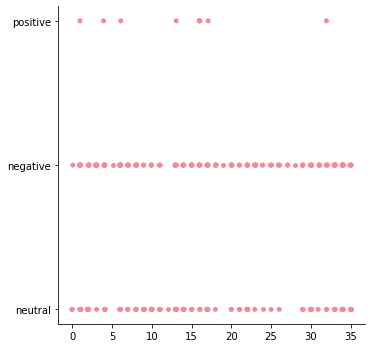

In [21]:
sns.catplot(data = subset, x = 'dateline', y = 'text_label')

In [18]:
subset = df[df.text_label != 'False']

In [22]:
subset.text_label.value_counts()

neutral     12310
negative     3991
positive      700
Name: text_label, dtype: int64

In [24]:
df.source.value_counts()

Youm7             3927
SaudiYoum         3484
Techreen          2856
Alittihad         2856
Almustaqbal       2681
Almasryalyoum     2142
Ryiadh            2142
Alqabas           1960
Sabanews          1157
Echoroukonline     357
Name: source, dtype: int64